In [1]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_100000.pickle'
TRACKS_DST = 'cache/tracks_100000.pickle'
WORMS_DST = 'cache/worms_100000.pickle'
ARTIFACTS_DST = 'cache/artifacts_100000.pickle'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
3165/3165 [==============================] - 37s 11ms/step - loss: 0.0304 - val_loss: 0.0187
Epoch 2/50
3165/3165 [==============================] - 35s 11ms/step - loss: 0.0017 - val_loss: 4.4374e-05
Epoch 3/50
3165/3165 [==============================] - 35s 11ms/step - loss: 1.7538e-05 - val_loss: 1.9352e-05
Epoch 4/50
3165/3165 [==============================] - 35s 11ms/step - loss: 1.2169e-05 - val_loss: 7.1067e-06
Epoch 5/50
3165/3165 [==============================] - 35s 11ms/step - loss: 7.5943e-06 - val_loss: 1.2684e-05
Epoch 6/50
3165/3165 [==============================] - 35s 11ms/step - loss: 7.6997e-06 - val_loss: 2.9166e-05
Epoch 7/50
3165/3165 [==============================] - 35s 11ms/step - loss: 6.5461e-06 - val_loss: 2.6968e-05
Epoch 8/50
3165/3165 [==============================] - 35s 11ms/step - loss: 3.8212e-06 - val_loss: 1.1807e-05
Epoch 9/50
3165/3165 [==========================

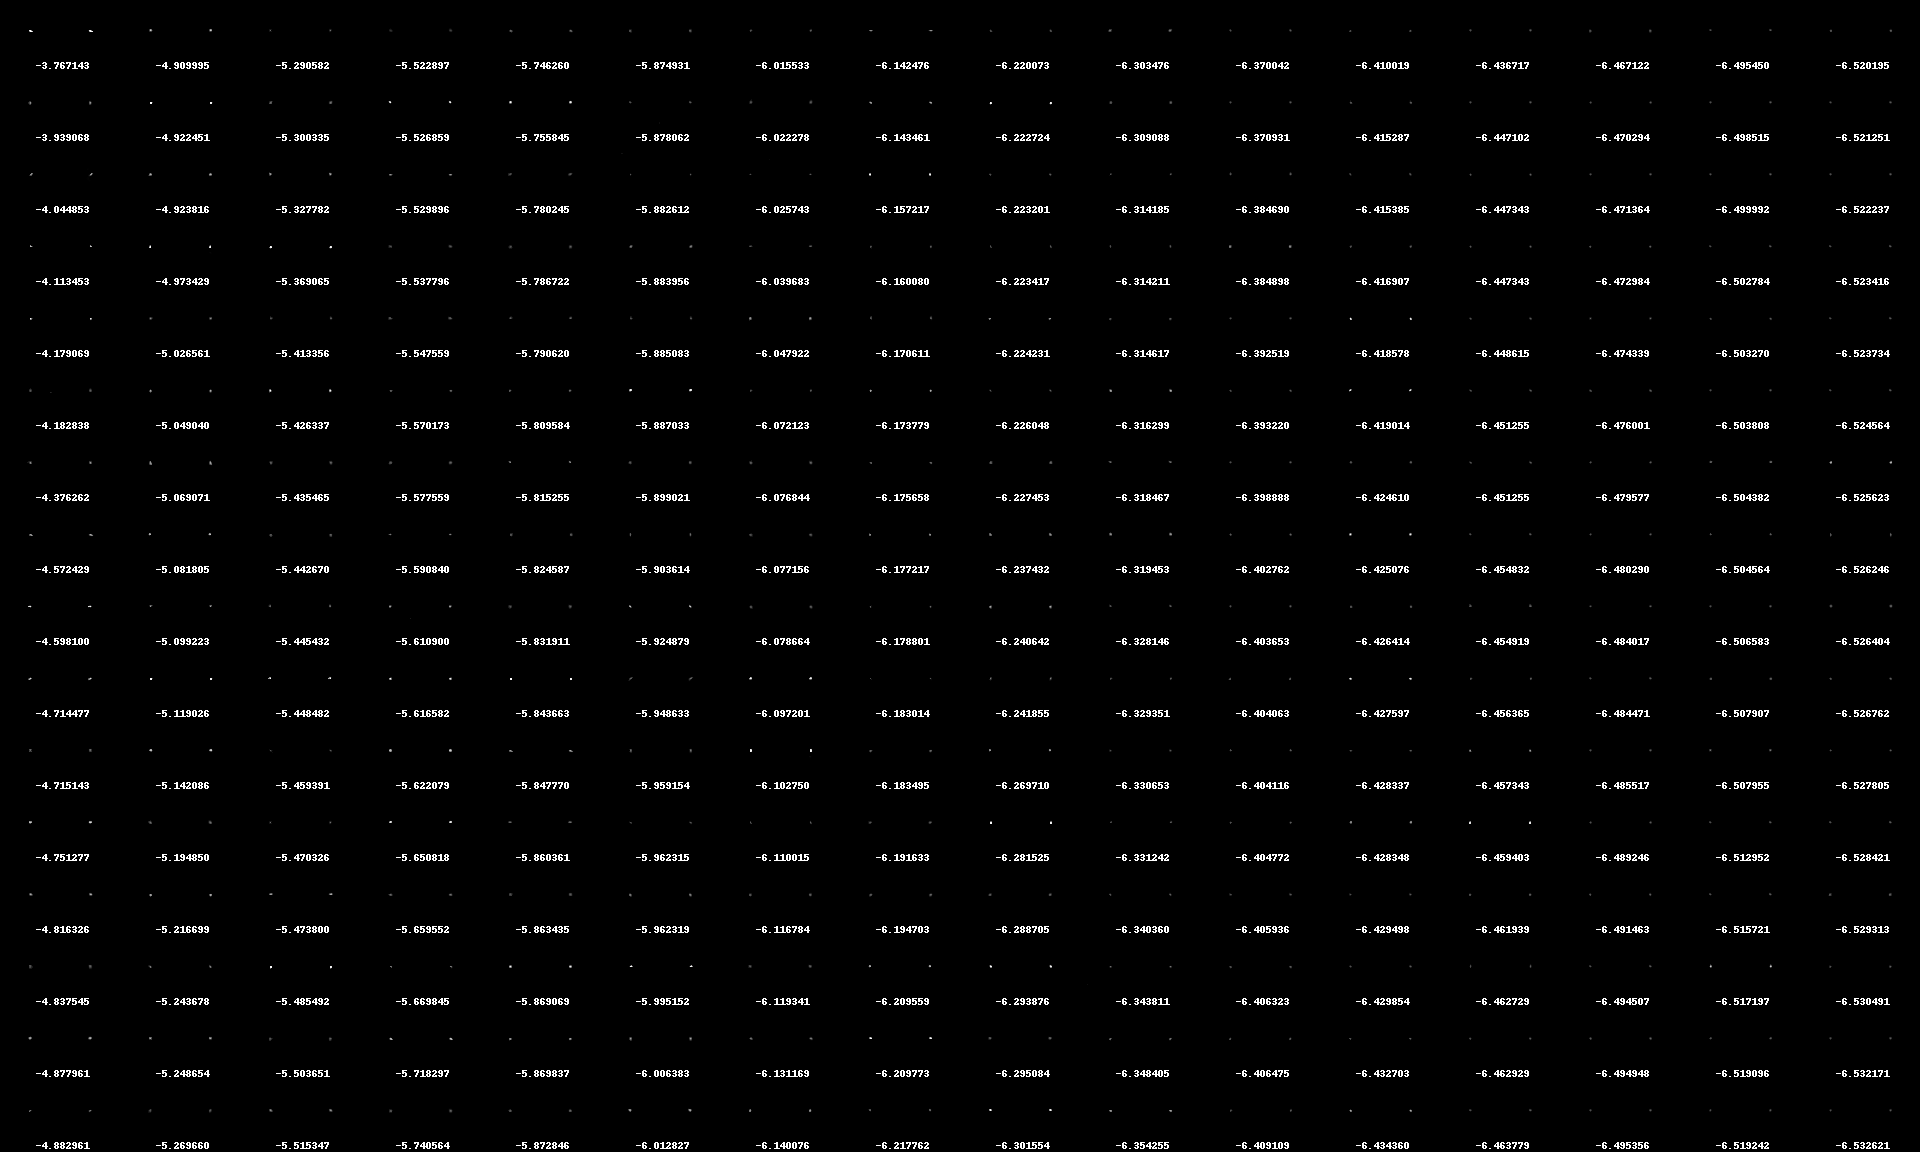

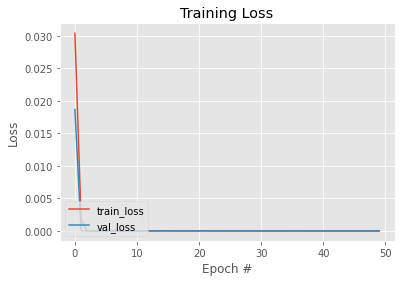

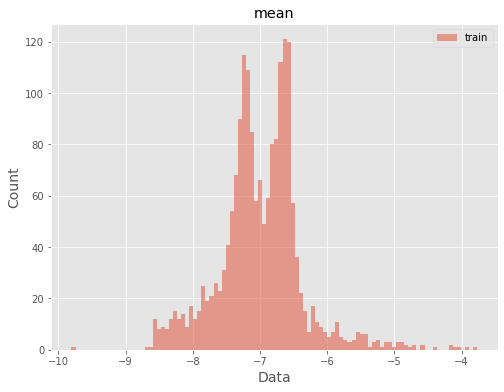

In [2]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
3161/3161 [==============================] - 36s 11ms/step - loss: 0.0136 - val_loss: 2.2661e-04
Epoch 2/50
3161/3161 [==============================] - 35s 11ms/step - loss: 1.9520e-04 - val_loss: 1.2591e-04
Epoch 3/50
3161/3161 [==============================] - 34s 11ms/step - loss: 1.2446e-04 - val_loss: 1.2692e-04
Epoch 4/50
3161/3161 [==============================] - 35s 11ms/step - loss: 9.6607e-05 - val_loss: 1.2076e-04
Epoch 5/50
3161/3161 [==============================] - 35s 11ms/step - loss: 8.0159e-05 - val_loss: 8.1003e-05
Epoch 6/50
3161/3161 [==============================] - 35s 11ms/step - loss: 6.9829e-05 - val_loss: 6.7721e-05
Epoch 7/50
3161/3161 [==============================] - 35s 11ms/step - loss: 6.5125e-05 - val_loss: 6.8485e-05
Epoch 8/50
3161/3161 [==============================] - 35s 11ms/step - loss: 5.9488e-05 - val_loss: 7.6210e-05
Epoch 9/50
3161/3161 [==================

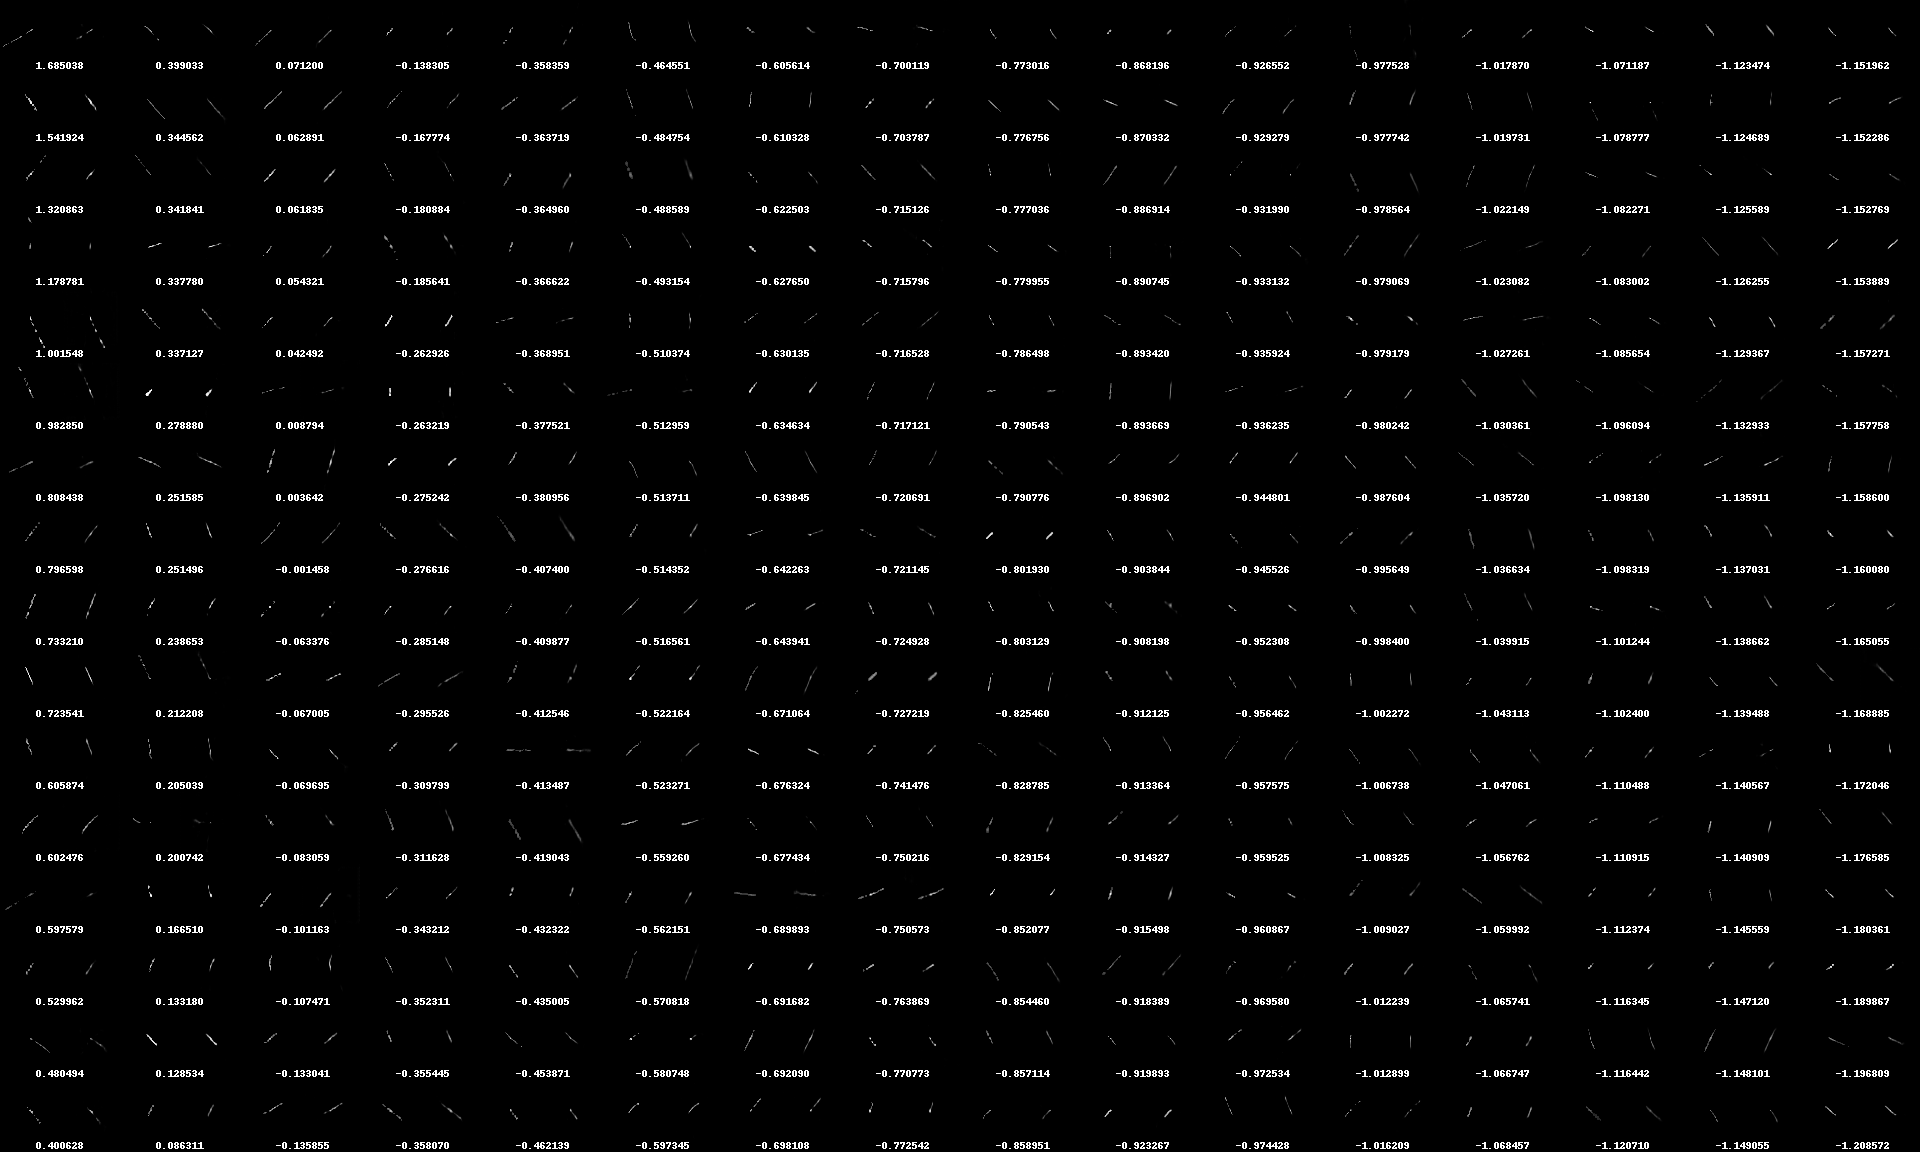

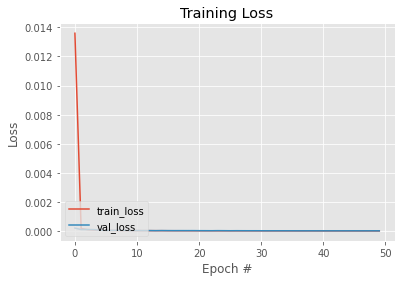

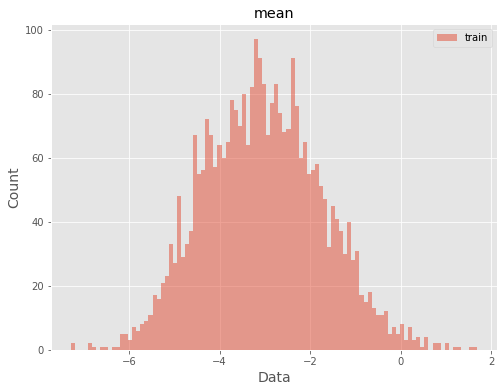

In [3]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
3131/3131 [==============================] - 31s 10ms/step - loss: 0.0036 - val_loss: 9.1200e-04
Epoch 2/50
3131/3131 [==============================] - 31s 10ms/step - loss: 8.3610e-04 - val_loss: 6.4195e-04
Epoch 3/50
3131/3131 [==============================] - 31s 10ms/step - loss: 6.5058e-04 - val_loss: 5.6807e-04
Epoch 4/50
3131/3131 [==============================] - 31s 10ms/step - loss: 5.6535e-04 - val_loss: 5.1320e-04
Epoch 5/50
3131/3131 [==============================] - 31s 10ms/step - loss: 5.1817e-04 - val_loss: 5.2043e-04
Epoch 6/50
3131/3131 [==============================] - 31s 10ms/step - loss: 4.7613e-04 - val_loss: 4.6709e-04
Epoch 7/50
3131/3131 [==============================] - 31s 10ms/step - loss: 4.4156e-04 - val_loss: 4.3900e-04
Epoch 8/50
3131/3131 [==============================] - 31s 10ms/step - loss: 4.1213e-04 - val_loss: 4.2054e-04
Epoch 9/50
3131/3131 [==================

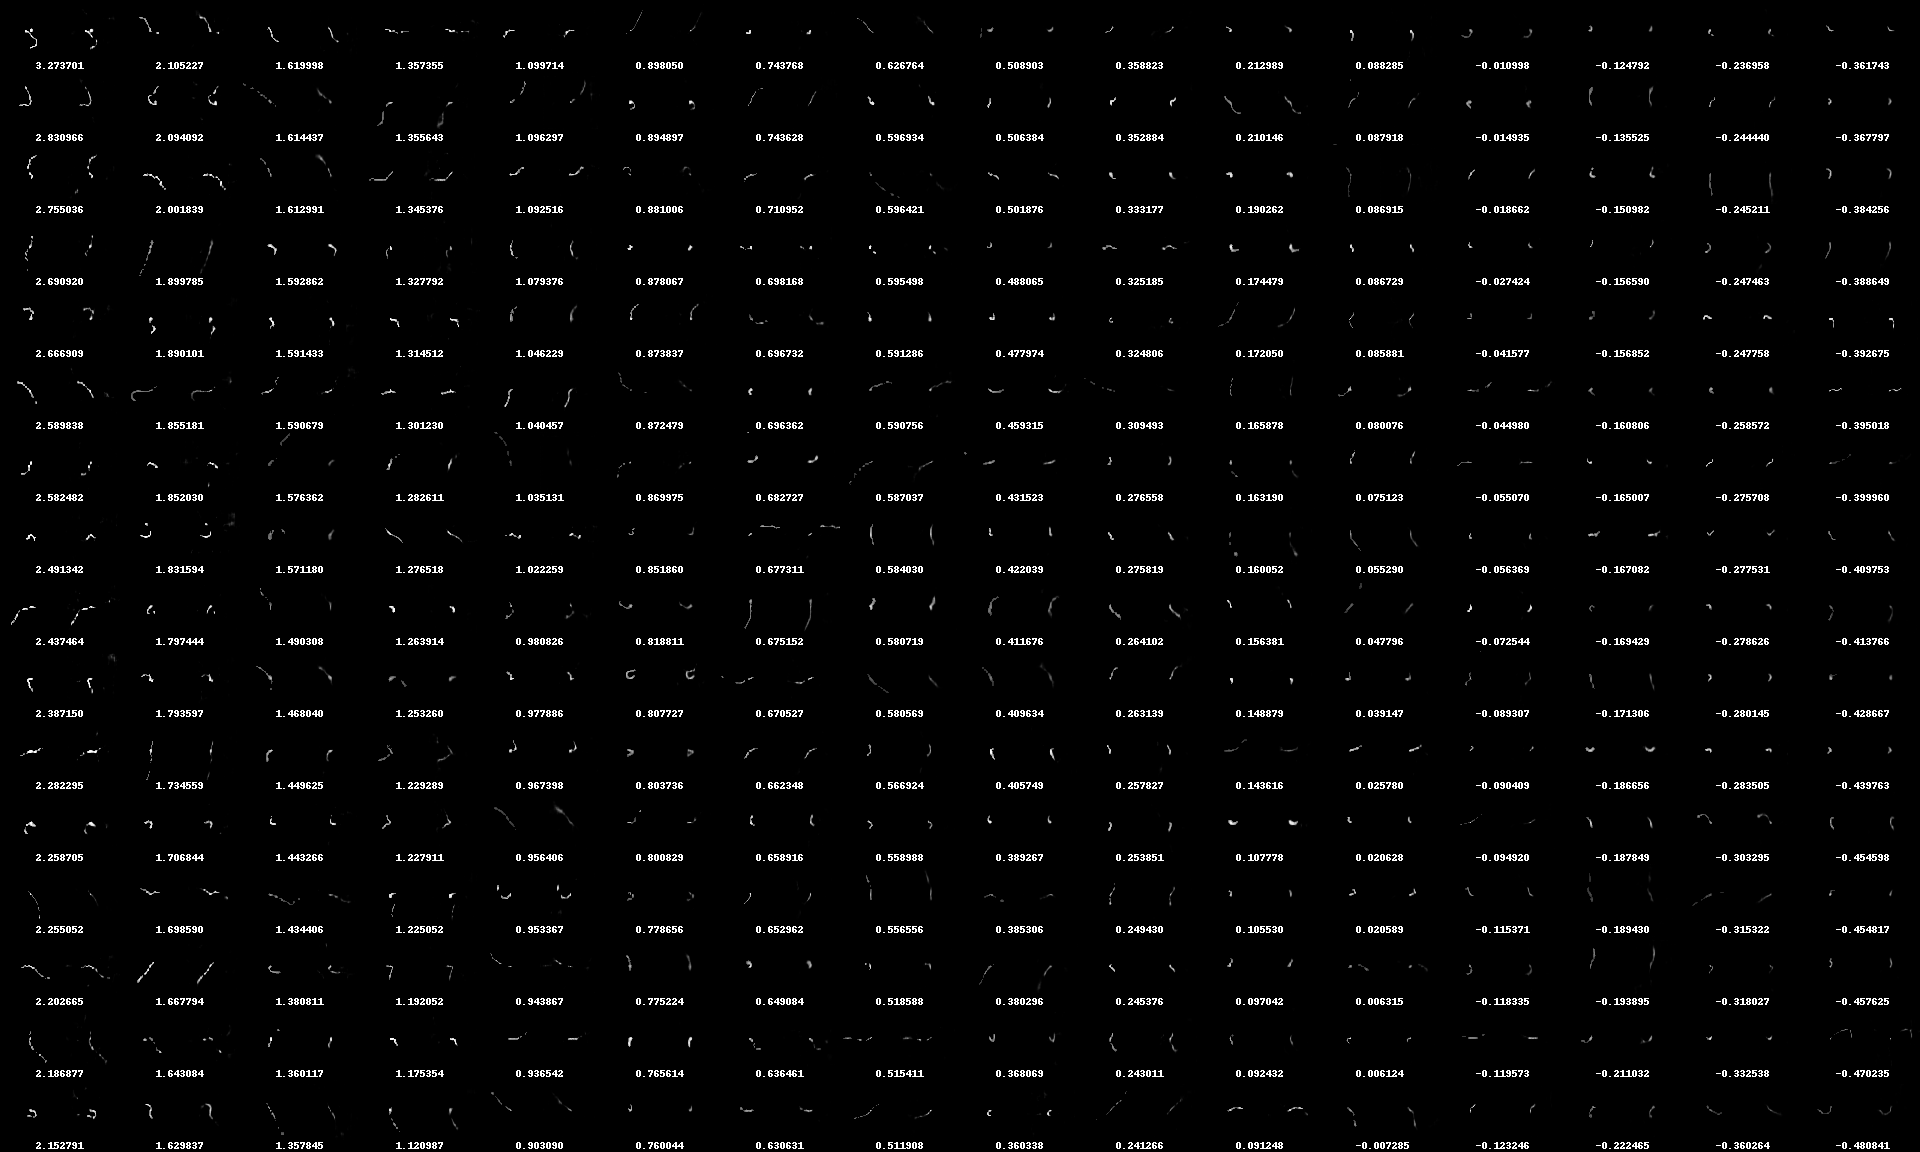

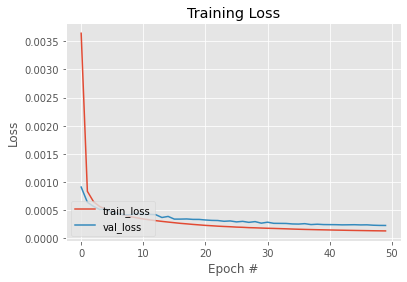

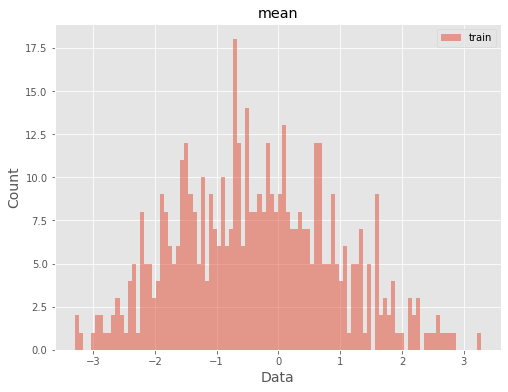

In [4]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
3130/3130 [==============================] - 36s 11ms/step - loss: 0.0023 - val_loss: 5.6527e-04
Epoch 2/50
3130/3130 [==============================] - 36s 11ms/step - loss: 5.2890e-04 - val_loss: 8.1417e-04
Epoch 3/50
3130/3130 [==============================] - 34s 11ms/step - loss: 4.4121e-04 - val_loss: 5.9118e-04
Epoch 4/50
3130/3130 [==============================] - 35s 11ms/step - loss: 3.7986e-04 - val_loss: 5.6122e-04
Epoch 5/50
3130/3130 [==============================] - 36s 12ms/step - loss: 3.2764e-04 - val_loss: 5.1505e-04
Epoch 6/50
3130/3130 [==============================] - 35s 11ms/step - loss: 3.0516e-04 - val_loss: 3.3532e-04
Epoch 7/50
3130/3130 [==============================] - 34s 11ms/step - loss: 2.7893e-04 - val_loss: 4.3104e-04
Epoch 8/50
3130/3130 [==============================] - 34s 11ms/step - loss: 2.5613e-04 - val_loss: 3.2910e-04
Epoch 9/50
3130/3130 [==================

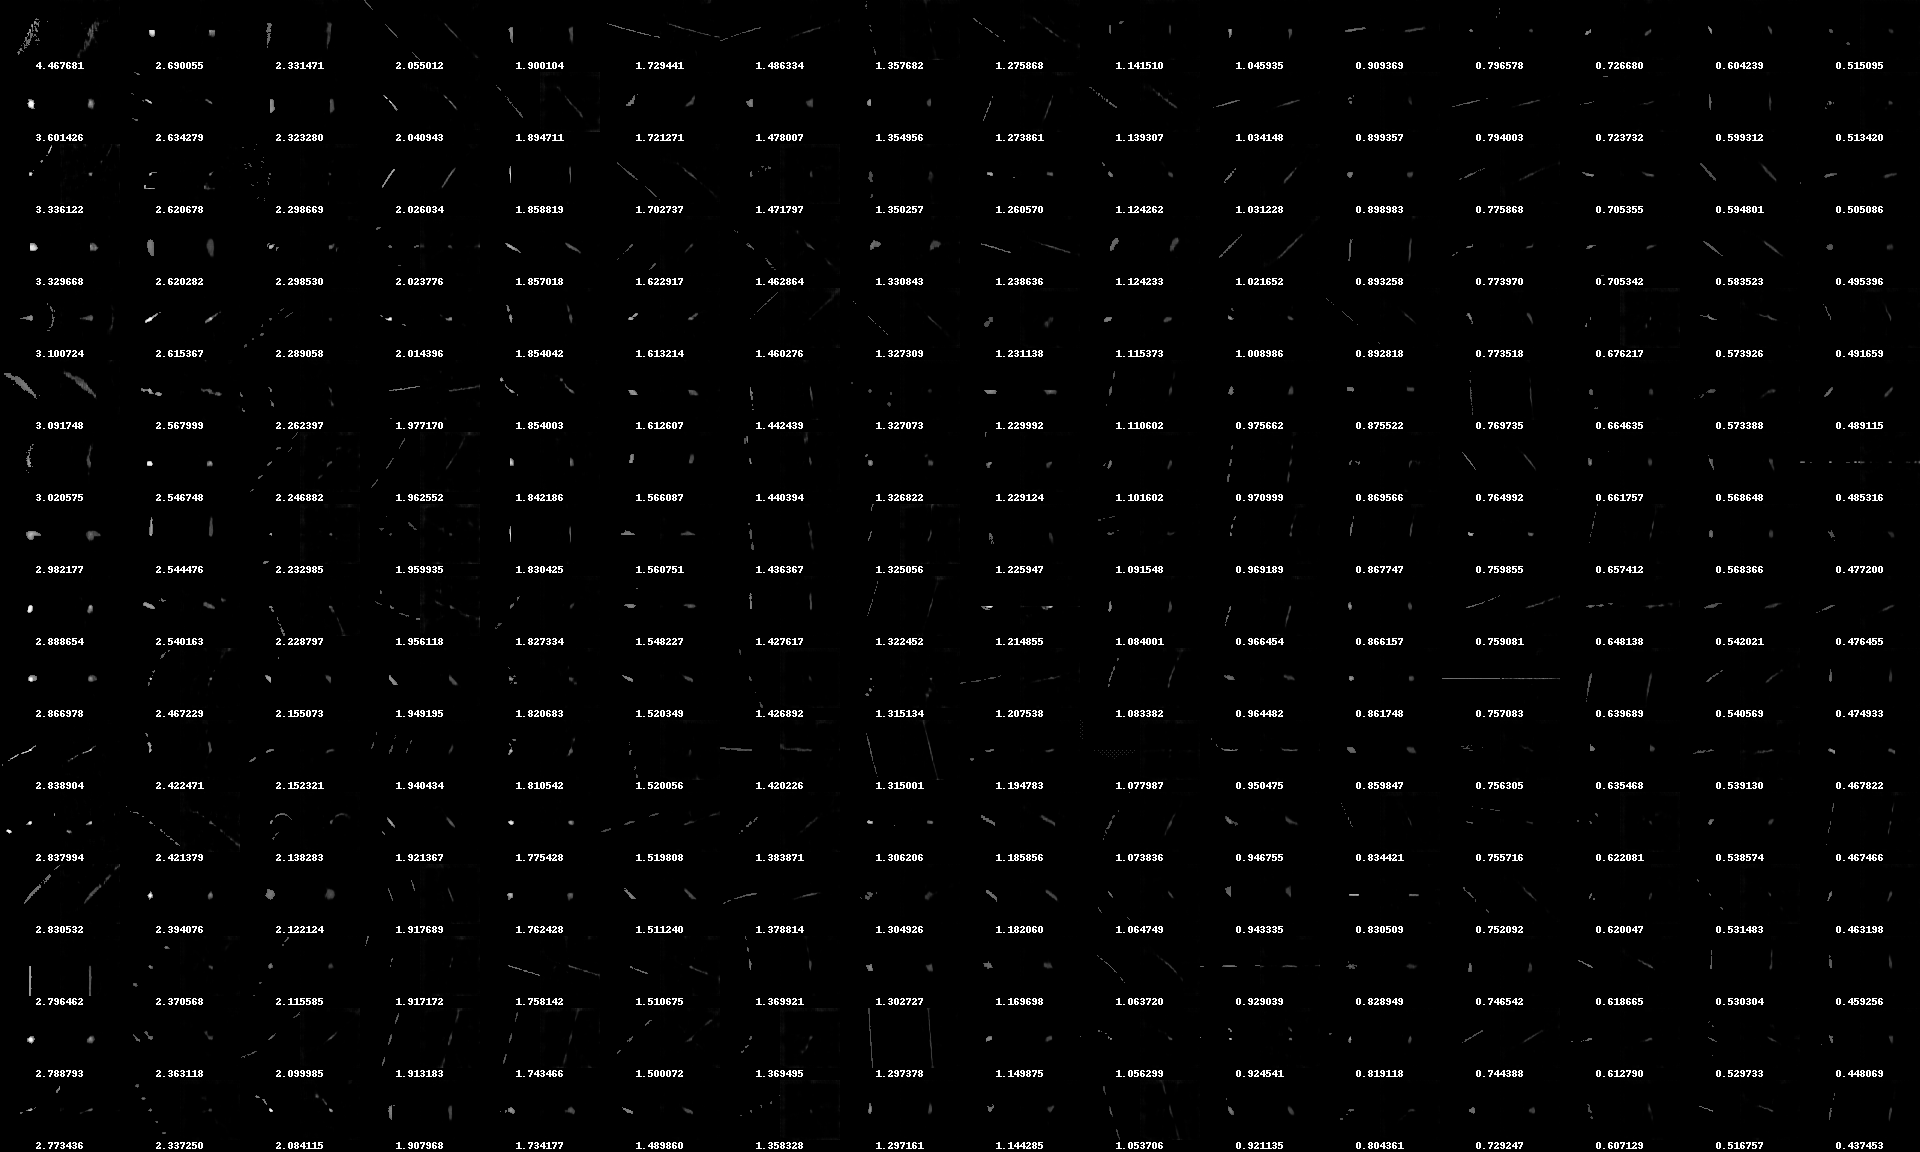

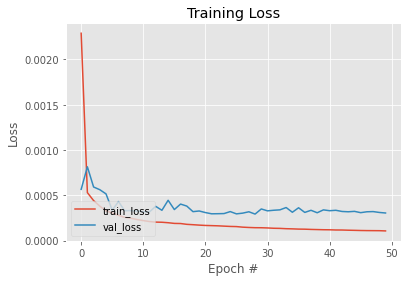

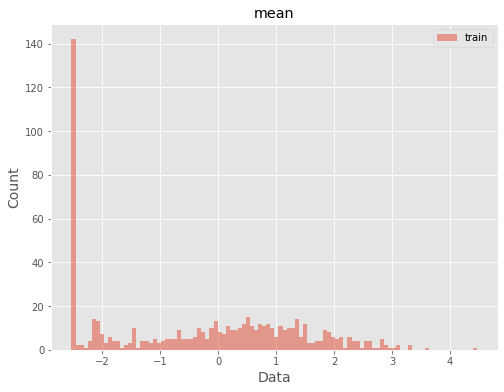

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)